# Machine Learning: Supervised - Logistic Regression 

# NAME: VIJAYA DURGA BANDI - 11601151

# Importing the Python Libraries: NumPy and Pandas
The code below imports two popular Python libraries, NumPy and Pandas, using the aliases "np" and "pd," respectively. we will use these libraries for data manipulation, analysis, and handling in Python.

In [8]:
import pandas as pd
import numpy as np

# Importing the Libraries & modules for data visualization
This code block below is importing the modules required for data visualization in Python. To generate a scatter plot matrix, it imports the scatter_matrix function from the pandas.plotting module, matplotlib.pyplot for general plotting capabilities, and seaborn for advanced data visualization features and styling. Using these libraries imported, we may develop a variety of visualizations to effectively explore and analyze data.

In [9]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Import Libraries & modules for data visualization
This code block below imports the libraries needed for data visualization in Python. It incorporates the scatter_matrix functionality from pandas.plotting module for scatter plot matrix, matplotlib.pyplot for general plotting capabilities, and seaborn for styling enhanced data visualization features With this library, we can create different visualizations to search and better analyze data.

In [10]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-Learn module for the algorithm/modeL: Logistic Regression
This code block below uses the LogisticRegression algorithm/model from scikit-learn, a popular machine learning library in Python. Logistic Regression is a supervised learning algorithm used for binary classification tasks. By importing this module, we can create and train logistic regression models to make predictions in binary classification problems, where output variables can take one of two possible classes

In [11]:
from sklearn.linear_model import LogisticRegression

# Import scikit-Learn module to split the dataset into train/ test sub-datasets
This code-block below here uses the train_test_split function from the model_selection module of scikit-learn. The train_test_split function is used to split the dataset into two parts: one to train the machine learning model and the other to test its performance. By using this function, we can split your data into training and testing subsets to assess the the model and avoid overfitting.

In [12]:
from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation

This code-block below imports two modules from scikit-learn in order to perform K-fold cross-validation.

KFold: This class is used to divide the data set into K subsets or folds. It helps us to create a test split with K trains, where the model is trained on K-1 clusters and tested on the remaining clusters.

cross_val_score: This function is used to check and K-fold cross-validation is used to validate the performance of the model. It calculates an analytical metric (e.g., accuracy, precision, recall) for each cluster and returns a range of scores, we can able to view the overall performance of the model across all clusters.

K-fold cross-validation is a robust method for assessing model performance and helps to obtain more reliable estimates of model effectiveness on unobserved data.

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Import scikit-Learn module classification report to later use for information about how the system try to classify each record
This code block down here imports the classification_report module from the scikit-learn metrics package. The classification_report function is used to generate a detailed report on the classification performance of machine learning models. It provides information such as accuracy, recall, F1-score, and support for each class to assess the model's ability to correctly classify or label characters in class classification tasks. This report is important for us understanding the model's strengths and weaknesses for classes.

In [14]:
from sklearn.metrics import classification_report

# Loading the Data

This code block shows the location of the dataset file "pima_diabetes.csv" using the file name. Then, it uses the Pandas read_csv function to load the data from the specified file into a Pandas DataFrame named df. The DataFrame df will contain the contents of the data set, which will make it easier for data manipulation and analysis in Python using Pandas.

In [15]:
# Specify location of the dataset

filename = ("C:\\Users\\vijay\\Downloads\\pima_diabetes.csv")

# Load the data into a Pandas DataFrame

df = pd.read_csv(filename)

# Look at the data frame

The code df.head() is a Pandas DataFrame method that displays the first few lines of the DataFrame df. By default, it displays the first five rows, allowing us to quickly explore the data and get a sense of its structure, column names, and values ​​in the data set

In [16]:
df.head()

preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

# Preprocess the Dataset
Clean the data: Find and Mark Missing Values

This code block here performs data preprocessing in the DataFrame df. It replaces the frequencies of 0 in columns 'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age' with NaN (Not Numbers). It fills the NaN values with the respective column's mean using fillna method, effectively imputing the missing data with the mean values of each column. This will help us in handling missing or invalid data and prepares the dataset for further analysis or modeling.

In [17]:
df[[ 'preg' , 'plas' , 'pres' ,'skin', 'test', 'mass', 'pedi', 'age']] \
= df[['preg' , 'plas' , 'pres' ,'skin', 'test', 'mass', 'pedi', 'age' ]].replace(0,np.NaN)

df=df.fillna(df.mean())

# Performing the Exploratory Data Analysis (EDA)

# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns

This code block here specifies the shape or size of the DataFrame df, which represents the number of records (rows) and variables (columns) in the data set. The shape property of the DataFrame returns a tuple with the number of rows and columns, respectively, and the print statement displays this information on the screen as "Shape of the dataset(rows, columns): (num_rows, num_columns)" as shown in the below output.

In [20]:
print("Shape of the dataset(rows, columns):",df.shape)

Shape of the dataset(rows, columns): (768, 9)


# get the data types of all the variables / attributes in the data set
This code block below displays all the data types of the variables or attributes in the DataFrame df. The dtypes attribute of a DataFrame returns a Series of data types for each column. The print statement brings this information, which helps us in understanding the data type of each feature in the data set, which is important for data analysis and modeling tasks

In [19]:
print(df.dtypes)

preg     float64
plas     float64
pres     float64
skin     float64
test     float64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


# return the summary statistics of the numeric variables/attributes in the data set
This code block creates and displays summary statistics for statistical variables or attributes in a DataFrame df. The describe() method calculates for each numeric column a set of statistics such as a set of statistics such as mean, mean, standard deviation, minimum, median and maximum Provides information about mean quality, width and distribution of numeric data in a dataset , to better understand the nature of the data.

In [21]:
print(df.describe())

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     4.494673  121.686763   72.405184   29.153420  155.548223   32.457464   
std      2.975395   30.435949   12.096346    8.790942   85.021108    6.875151   
min      1.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      2.000000   99.750000   64.000000   25.000000  121.500000   27.500000   
50%      4.494673  117.000000   72.202592   29.153420  155.548223   32.400000   
75%      6.000000  140.250000   80.000000   32.000000  155.548223   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

# Class distribution
This code block calculates and displays the class distribution of the 'class' variable in the DataFrame df. The groupby() method groups the data by the unique value of the 'class' column, and the size() function counts each class occurrence. The print statement provides the number of records in each class, which provides insight into the distribution of classes in the data set, which is important for class-free logic in classification tasks.

In [22]:
class_distribution = df.groupby('class').size()
print(class_distribution)

class
0    500
1    268
dtype: int64


# Three different EDA

# Histogram
This code block is plotting histograms for each variable (column) in the DataFrame df. The hist() function from Pandas is used to generate the histograms. The edgecolor='black' sets the color of the histogram bars' edges to black, and figsize=(14, 12) specifies the size of the plot. Finally, plt.show() is used to display the histogram plot on the screen. The resulting visualization allows us to observe the distribution of each variable's data and gain insights into their characteristics and ranges.

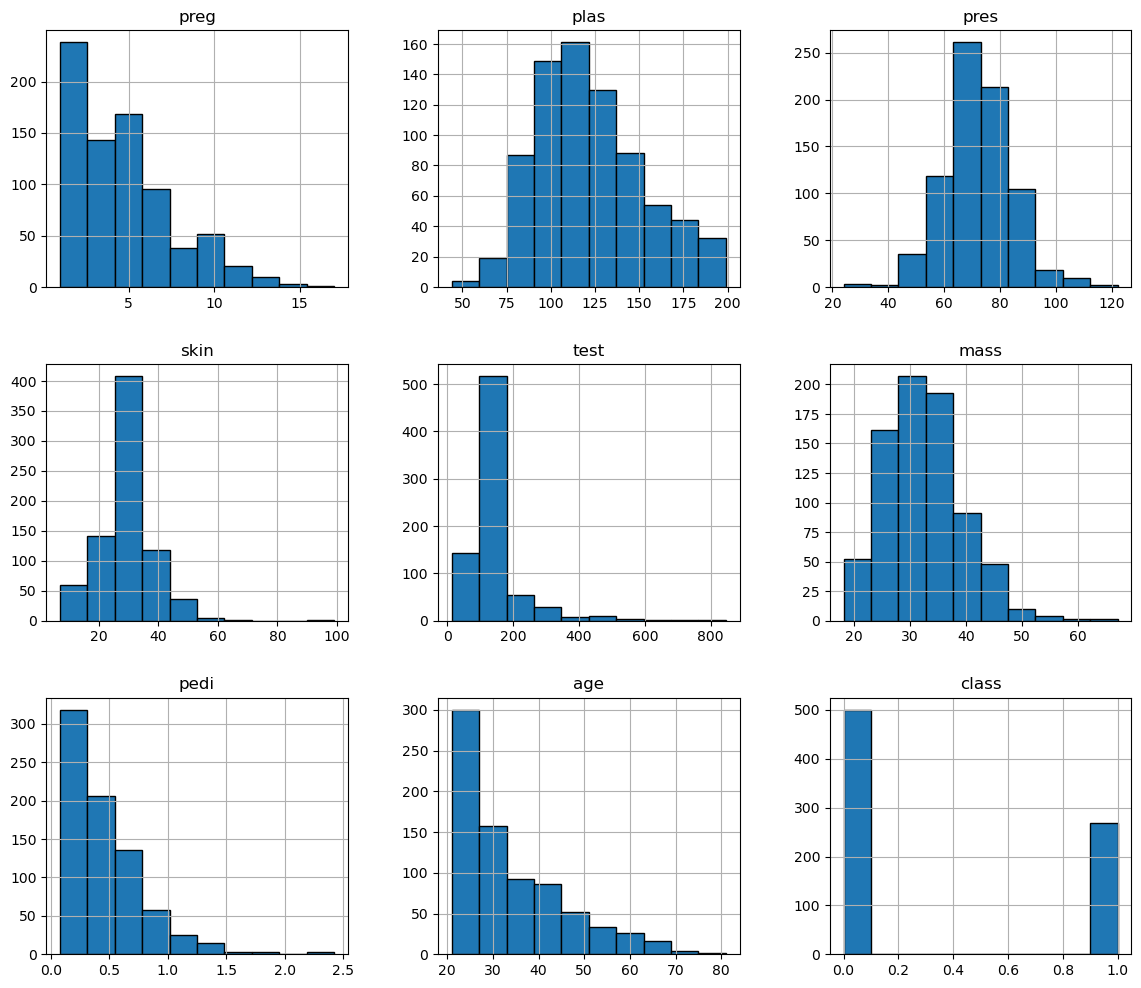

In [23]:
# Plot histogram for each variable. 

df.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

# BOX PLOT

# Creating a Box Plot
This code block here is creating a grid of boxplots for each variable (column) in the DataFrame df. The plot() function with kind="box" parameter generates boxplots for each column. The subplots=True displays each boxplot separately, arranged in a 5x3 grid specified by layout=(5,3). sharex=False ensures that each boxplot has its x-axis, and figsize=(20,18) sets the size of the plot. The resulting visualization provides insights into the distribution, central tendency, and outliers of each variable's data.

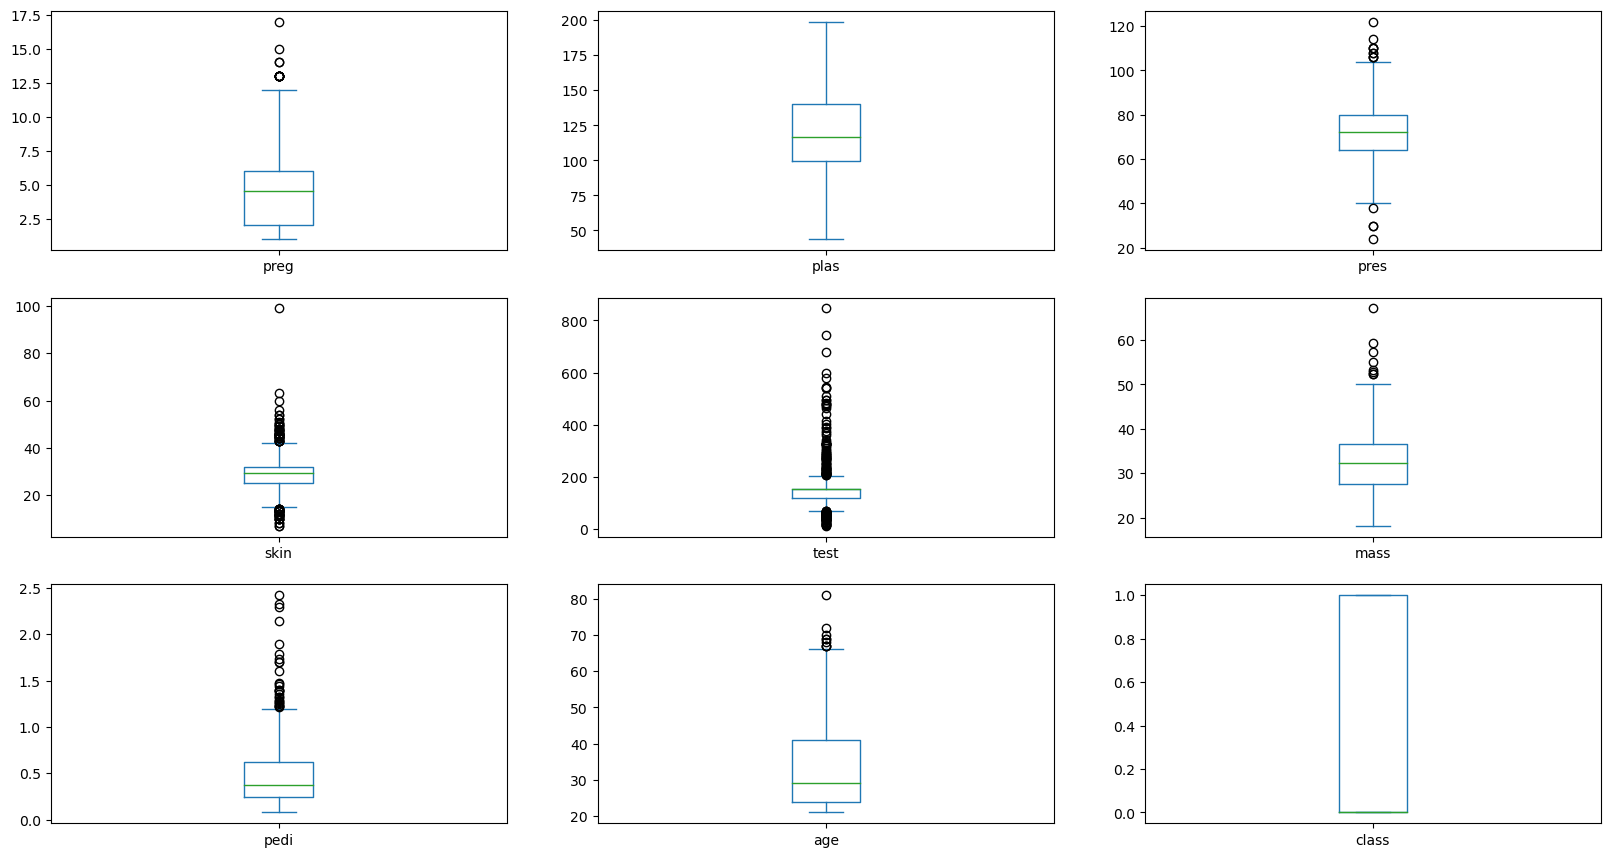

In [24]:
# Boxplots

df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,18))
plt.show()

# Create a Pair Plot

This code block creates a pair plot that implements the Seaborn pairplot function for the DataFrame df. The Pairplot function produces a grid of scatter plots, where each statistical variable is plotted against every other statistical variable in the data set. The Height=3.5 parameter controls the size of each subplot, and plt.show() displays the pair plot on the screen. The resulting model allows us to generate relationships and assumptions between pairs of variables in a data set, helping us for exploratory data analysis.

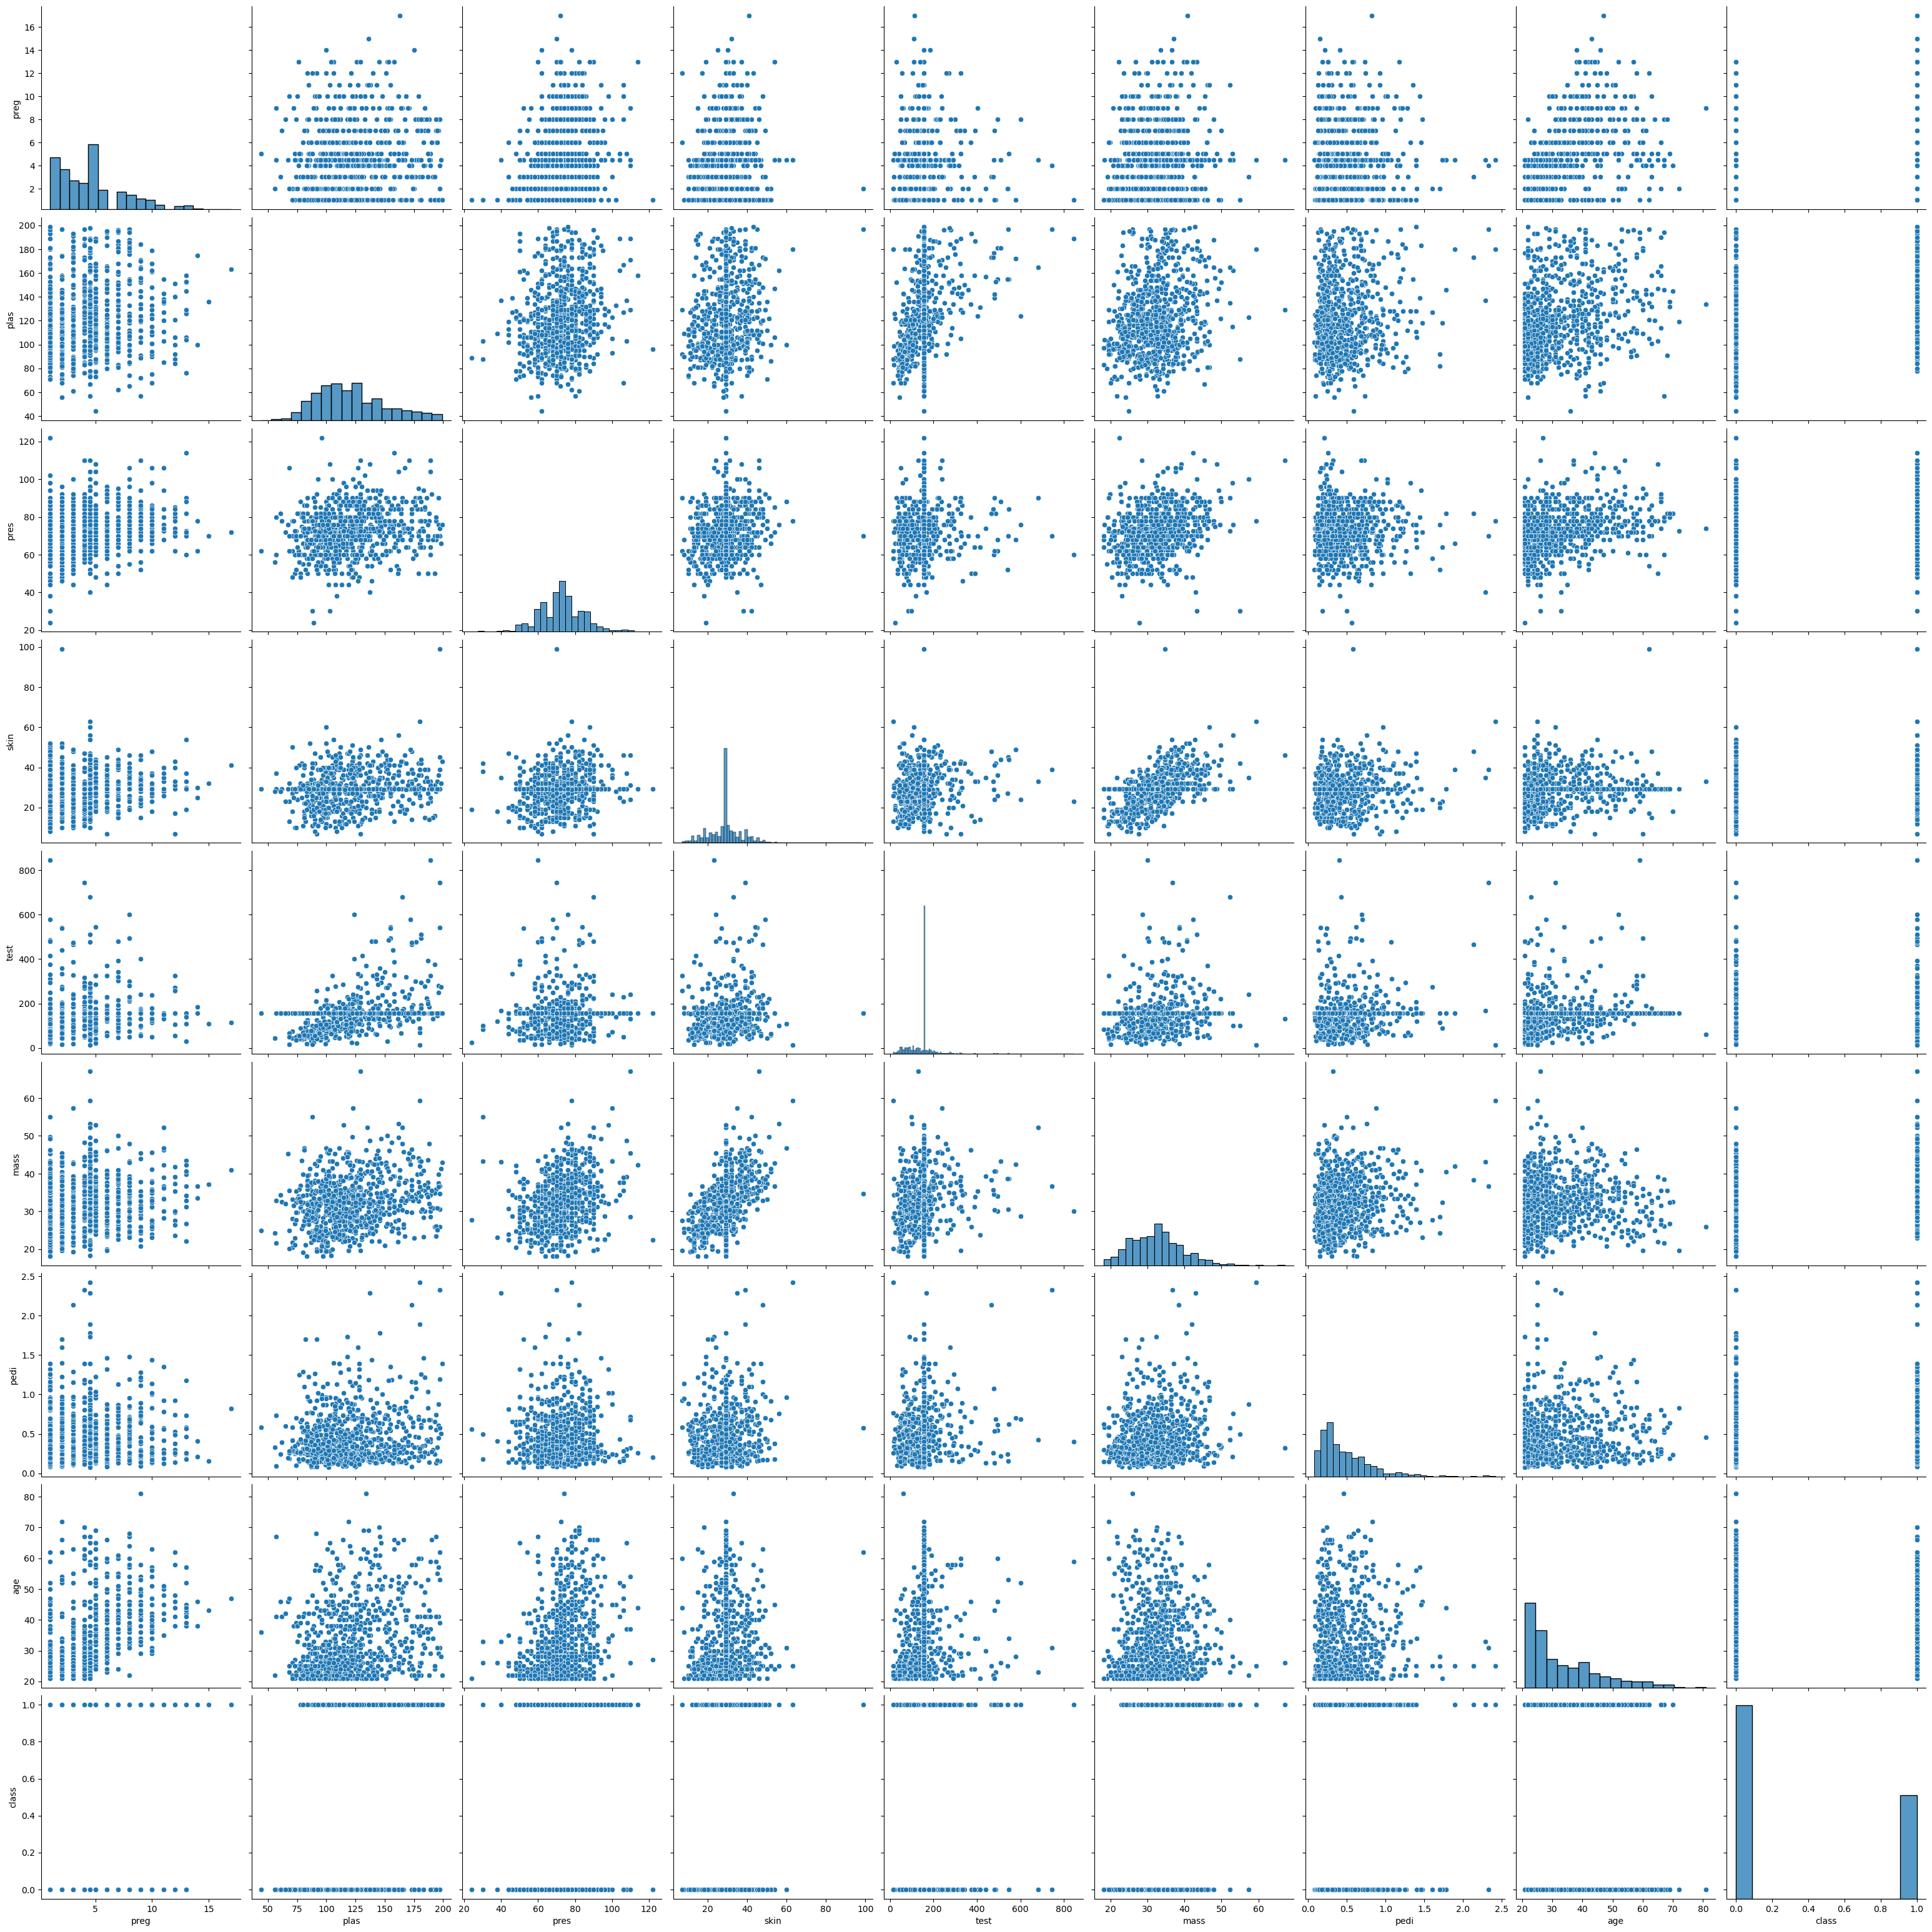

In [25]:
# Pair plot
sns.pairplot(df, height=3.5);
plt.show()

# Creating a Pair Plot with Color

This code block creates a pair plot that implements the Seaborn pairplot function for the DataFrame df. The Hue='class' parameter adds color to the plot based on the 'class' variable, which helps to easily distinguish between data points and classes. height=3 sets the height of each subplot, aspect=1 controls the aspect ratio of the subplot. The resulting simulation shows scatter diagrams for pairs of variables, describing data points based on their classes, and enabling a better understanding of relationships and patterns between variables across classes. The data points in the scatter plots are color-coded based on the 'class' variable, allowing visualization of relationships between variables while considering their class labels.

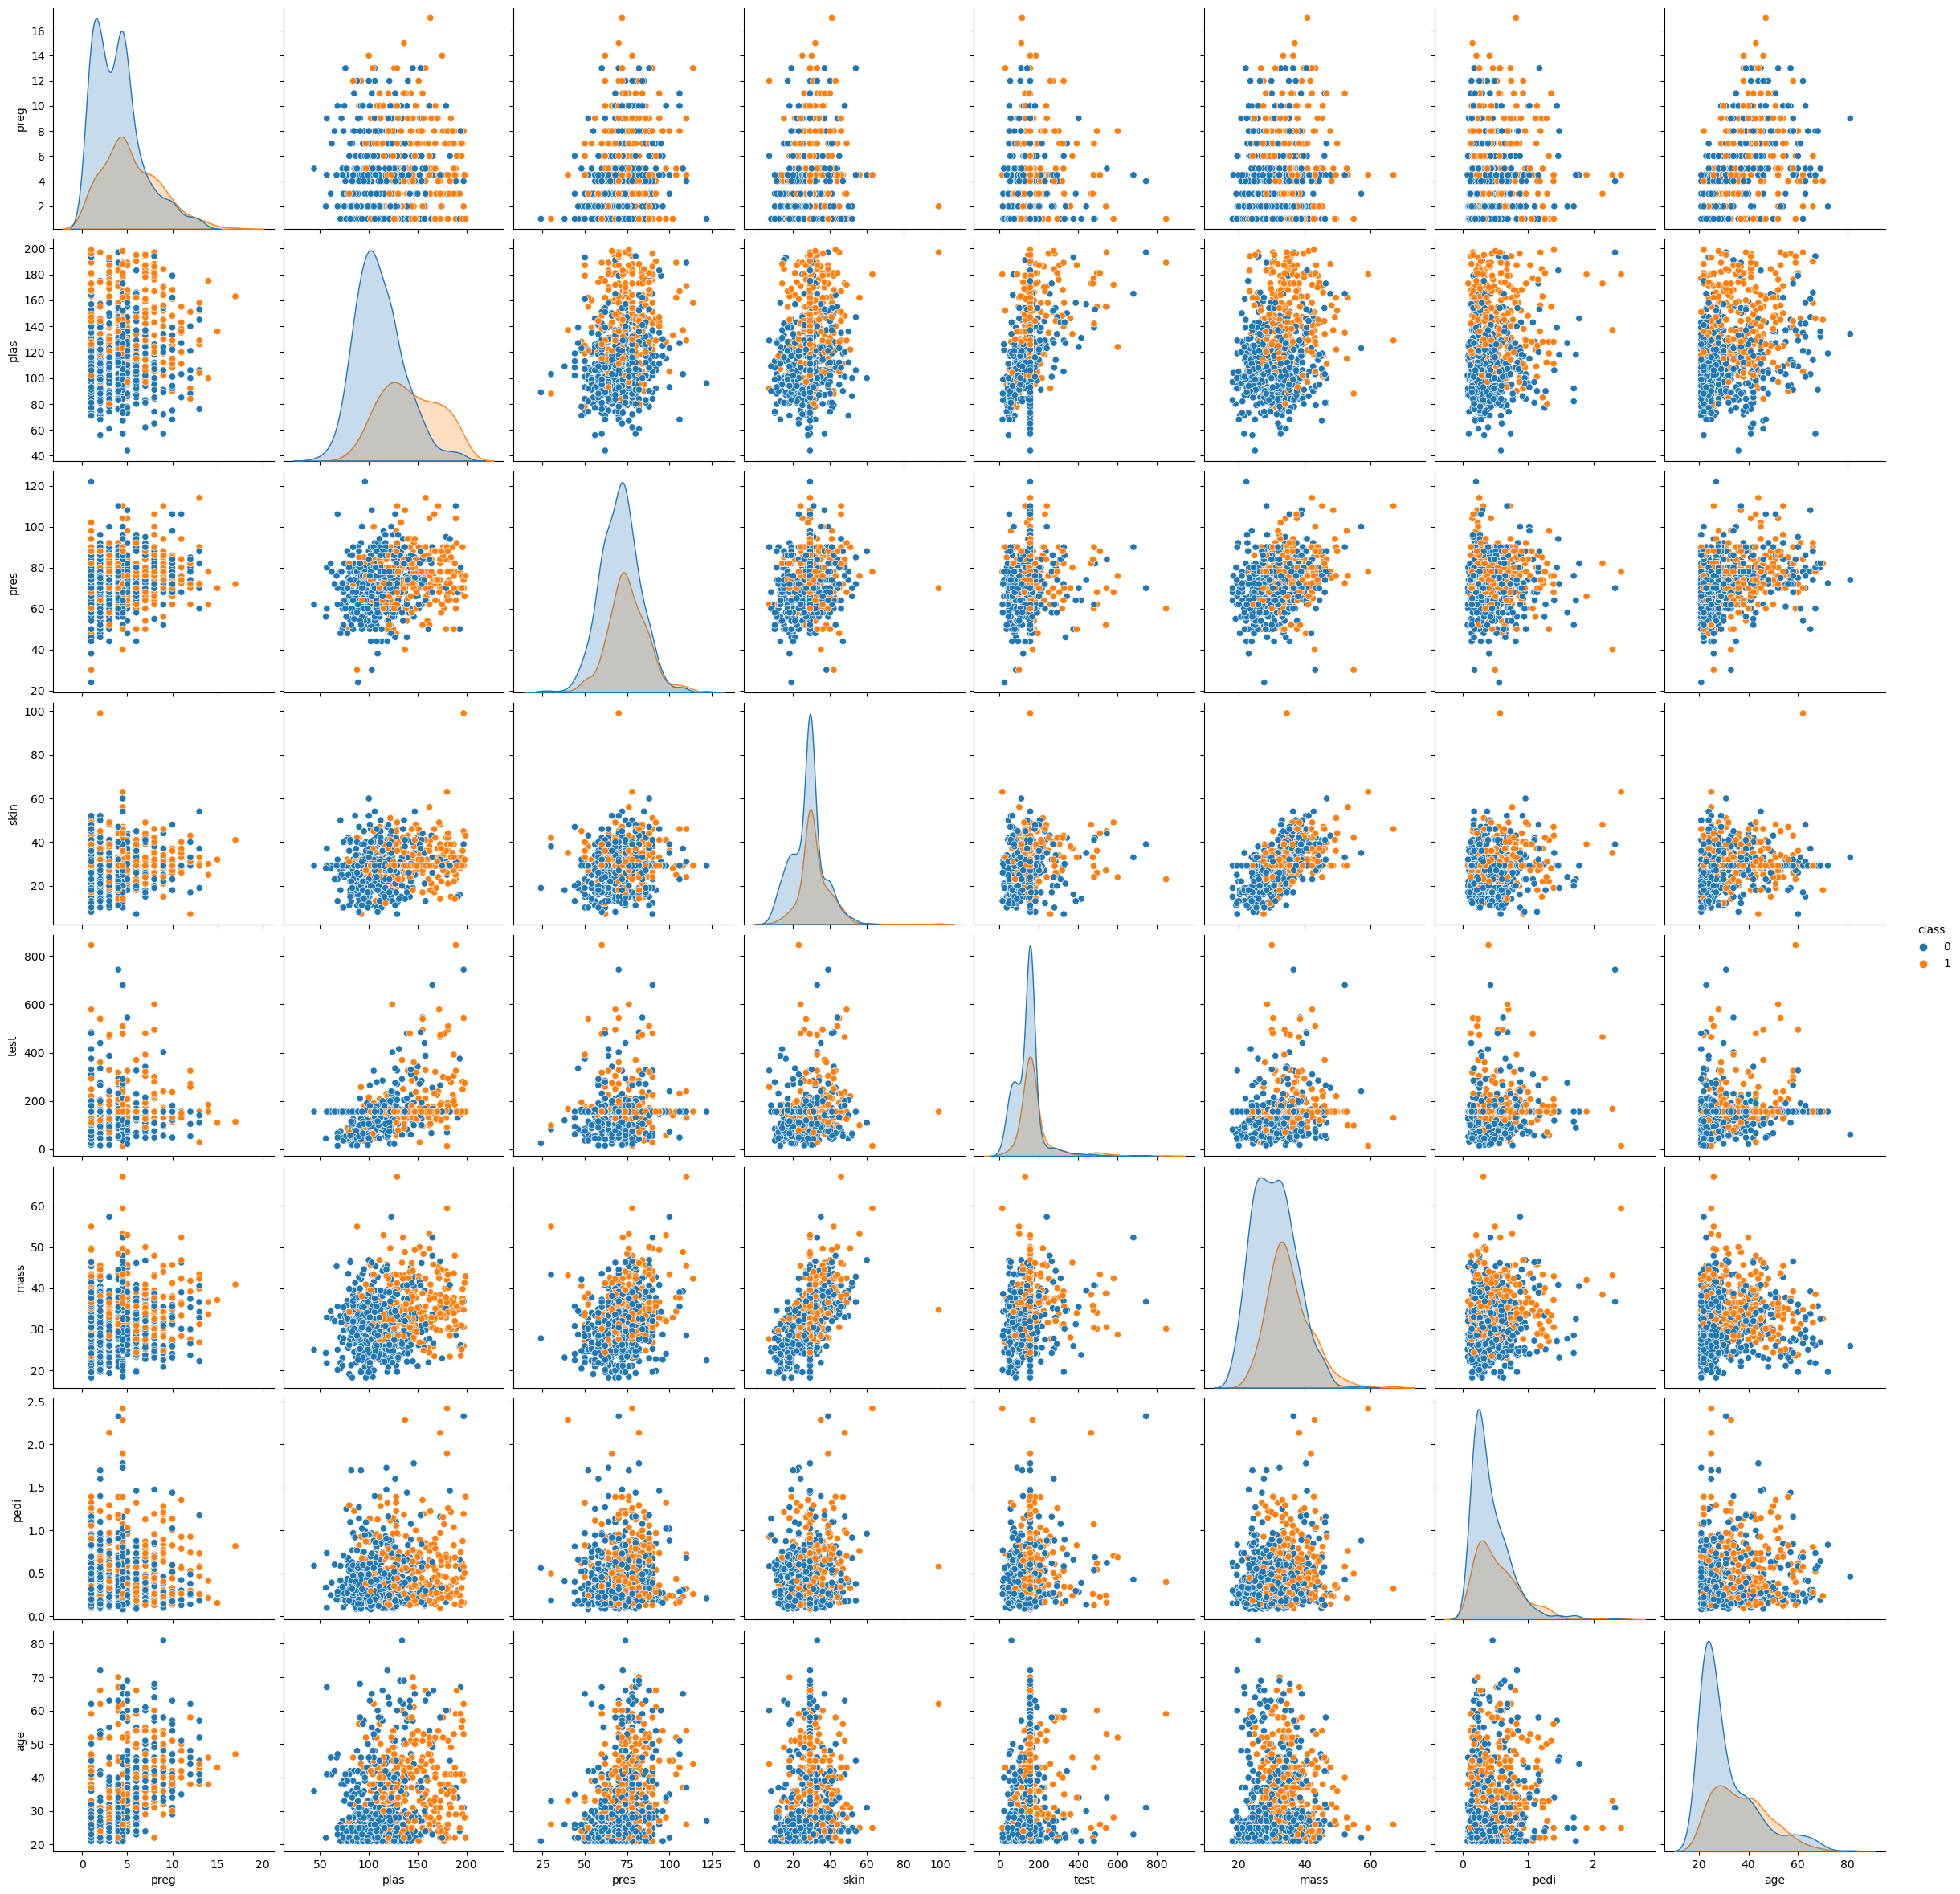

In [26]:
# Let's try that again using color. 

sns.pairplot(df, hue='class', height=3, aspect= 1);

# Creating a Violin Plot

This code block is creating a grid of nine violin plots using Seaborn's violinplot function. Each violin plot represents the distribution of a numeric variable ('preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age') across the two classes defined by the 'class' variable in the DataFrame df. The plots display the density of data at different values, helping to visualize the distribution and density of each variable for each class. The plt.tight_layout() ensures proper spacing between subplots, and plt.show() displays the violin plot grid on the screen.

The output of this code is a grid of nine violin plots, each showing the distribution of a numeric variable ('preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age') with respect to the two classes defined by the 'class' variable in the DataFrame df. The violin plots visualize the density and distribution of each variable's data for each class, helping us to easily compare the distributions across different categories.

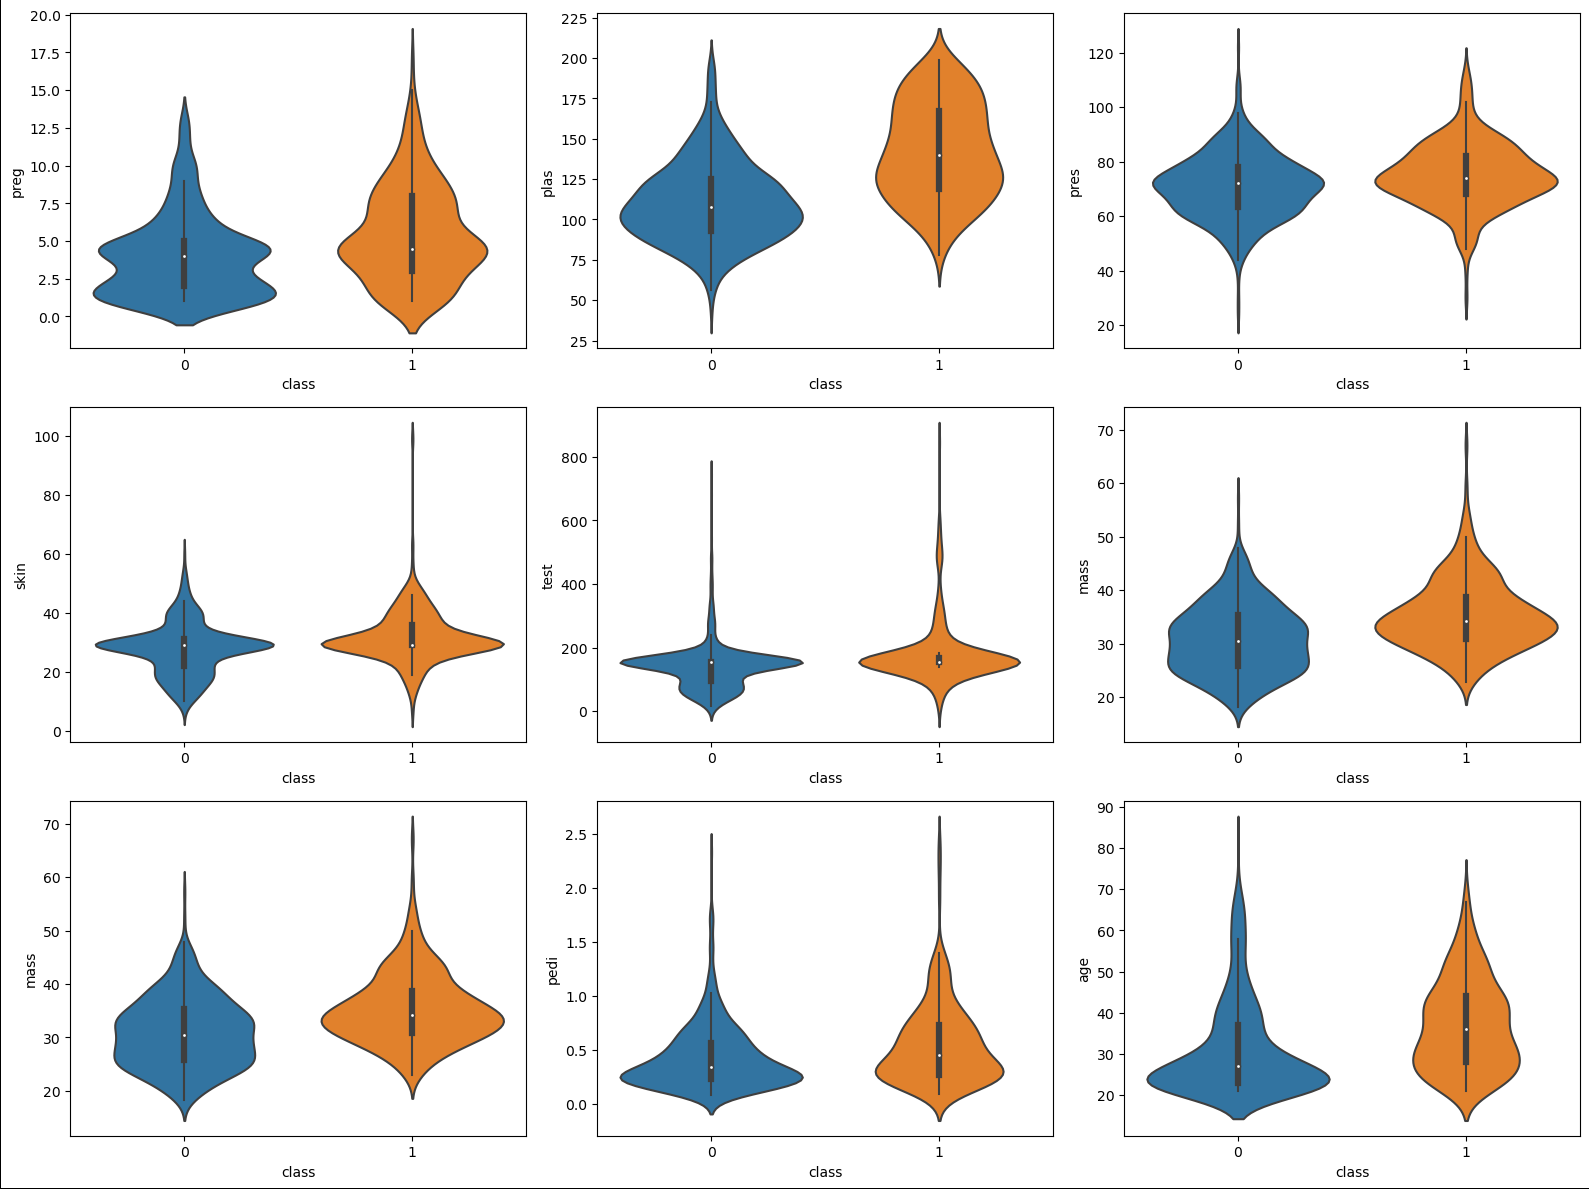

In [27]:
# Violin Plots

plt.figure(edgecolor="black", linewidth=1.2, figsize=(16, 12))

plt.subplot(3, 3, 1)
sns.violinplot(x='class', y='preg', data=df)
plt.subplot(3, 3, 2)
sns.violinplot(x='class', y='plas', data=df)
plt.subplot(3, 3, 3)
sns.violinplot(x='class', y='pres', data=df)
plt.subplot(3, 3, 4)
sns.violinplot(x='class', y='skin', data=df)
plt.subplot(3, 3, 5)
sns.violinplot(x='class', y='test', data=df)
plt.subplot(3, 3, 6)
sns.violinplot(x='class', y='mass', data=df)
plt.subplot(3, 3, 7)
sns.violinplot(x='class', y='mass', data=df)
plt.subplot(3, 3, 8)
sns.violinplot(x='class', y='pedi', data=df)
plt.subplot(3, 3, 9)
sns.violinplot(x='class', y='age', data=df)

plt.tight_layout()
plt.show()


# Separate the Dataset into Input & Output NumPy Arrays

This code block below is separating the input features (X) and the target variable (y) from the DataFrame df. It drops the 'class' column from df to create X, which contains all the features. The 'class' column is then assigned to y as the target variable. The last line converts the target variable y to binary format by setting values greater or equal to 0.5 as 1 (positive class) and values less than 0.5 as 0 (negative class). This conversion is typically done for binary classification tasks to map the target variable into discrete classes, which will make it suitable for training classification models. The specific threshold (0.5) here is used based on the problem requirements. The output of this code block is: The input features X, which is a DataFrame containing all the columns of df except for the 'class' column.
The target variable y, which is a Series containing the 'class' column from df, converted to binary format with values 0 and 1 based on the threshold of 0.5.

In [28]:
# Separate the input features and the target variable
X = df.drop('class', axis=1)
y = df['class']
# Convert the target variable to binary format
y = (y >= 0.5).astype(int)

# Spilt into Input/Output Array into Training/Testing Datasets

This code block below is splitting the data into training and testing sets for the input features (X) and the target variable (y) using a 70/30 split. The train_test_split function from scikit-learn is used for this purpose, and the random_state is set to 7 to ensure reproducibility. X_train and Y_train: These are the training sets containing 70% of the data for the input features (X) and the target variable (y), respectively.
X_test and Y_test: These are the testing sets containing 30% of the data for the input features (X) and the target variable (y), respectively. The output is the four separate data sets X_train, X_test, Y_train, and Y_test, which represent the training and testing sets split from the original input features (X) and target variable (y) with a 70/30 ratio.

In [29]:
# Split the data into training and testing sets with a 70/30 split (using seed=7)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Build and Train the Model

This code block below is building a logistic regression model using scikit-learn's LogisticRegression class. The model object is initialized with the logistic regression algorithm, and the random_state is set to 7 for reproducibility. Additionally, the max_iter parameter is set to 1000, which controls the maximum number of iterations for the algorithm to converge during training. This is the logistic regression model object that will be used for training and prediction. random_state=7: This ensures that the model's random initialization is reproducible, providing consistent results.
The output is the logistic regression model model, which is ready to be trained on the training data and used for predictions.

In [35]:
# Build the logistic regression model
model = LogisticRegression(random_state=7, max_iter=1000)

This code block below is training the logistic regression model using the training sub-dataset (X_train and Y_train). The fit method from the logistic regression model is called to perform the training process, where the algorithm learns from the input features (X_train) and their corresponding target labels (Y_train) to create a predictive model. model.fit(X_train, Y_train): This line of code fits the logistic regression model to the training data, allowing the algorithm to learn the relationships between the input features and target variable. The output is the trained logistic regression model model, which has learned from the training data and is ready to make predictions on new, unseen data.

In [36]:
# Train the model using the training sub-dataset
model.fit(X_train, Y_train)


LogisticRegression(max_iter=1000, random_state=7)

This code block is using the trained logistic regression model to make predictions on the test set (X_test). The predict method is called to generate the predicted outcomes (predicted) for the test data. Then, the classification report is computed using the classification_report function, which compares the predicted outcomes with the actual target labels (Y_test) and provides a summary of classification metrics for evaluating the model's performance.
predicted: This variable holds the predicted outcomes for the test data based on the logistic regression model.
report: This variable stores the classification report, which includes metrics such as precision, recall, F1-score, and support, summarizing the model's performance on the test data as shown below.
Output:
The output is the classification report, which displays various classification metrics, helping to assess the accuracy and effectiveness of the logistic regression model on the test data.

In [34]:
# Predict the outcomes for the test set
predicted = model.predict(X_test)
# Print the classification report
report = classification_report(Y_test, predicted)
print("Classification Report: \n\n", report)

Classification Report: 

               precision    recall  f1-score   support

           0       0.78      0.85      0.81       147
           1       0.69      0.58      0.63        84

    accuracy                           0.75       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



The classification report provides a summary of the model's performance on the test data:
Precision: For class 0, the model achieved 78% precision, and for class 1, it achieved 69% precision. Precision measures the proportion of true positive predictions out of all positive predictions.
Recall: For class 0, the model achieved 85% recall, and for class 1, it achieved 58% recall. Recall (also known as sensitivity) measures the proportion of true positive predictions out of all actual positive instances.
Output:
Precision: Class 0 - 0.78, Class 1 - 0.69
Recall: Class 0 - 0.85, Class 1 - 0.58
The classification report also includes other metrics such as F1-score, support, accuracy, and macro/weighted average, providing a comprehensive evaluation of the model's performance for each class and overall. The accuracy of the model on the test data is 75%.

# Score the Accuracy of the Model

This code block is scoring the accuracy level of the trained logistic regression model (model) on the test data (X_test and Y_test). The score method from the logistic regression model is used to compute the accuracy of the model's predictions compared to the actual target labels. The result is then printed out as a percentage to indicate the accuracy of the model on the test data.
result: This variable holds the accuracy score of the logistic regression model on the test data.
print(("Accuracy: %.3f%%") % (result*100.0)): This line prints the accuracy of the model in percentage format, providing a measure of how well the model performed in making correct predictions on the test data.
Output:
The output is the accuracy of the logistic regression model, represented as a percentage. It indicates the proportion of correctly predicted outcomes (both class 0 and class 1) out of the total number of data points in the test set.
The output of this code is the accuracy of the logistic regression model on the test data, which is approximately 75.325%. This accuracy value represents the proportion of correct predictions made by the model on the test set, indicating its performance in correctly classifying data points into their respective classes.

In [37]:
#score the accuracy level

result = model.score(X_test, Y_test)

#print out the results

print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 75.325%


# Classify/Prediction

This code block is calculating and displaying the mean, minimum, and maximum values for each predictor (column) in the DataFrame df. It uses the mean(), min(), and max() functions from Pandas to calculate these descriptive statistics. The resulting output shows the central tendency and the range of values for each predictor in the dataset, providing insights into the overall distribution of the data.
existing_means: This variable stores the mean values of each predictor in the DataFrame df.
existing_mins: This variable stores the minimum values of each predictor in the DataFrame df.
existing_maxs: This variable stores the maximum values of each predictor in the DataFrame df.
Output:
The output displays the mean, minimum, and maximum values for each predictor in the dataset, providing a summary of their statistical characteristics.
We can see that 'plas' (plasma glucose concentration) has a mean of approximately 121.69, with a minimum value of 44 and a maximum value of 199. Similarly, 'age' has a mean of approximately 33.24, with a minimum of 21 and a maximum of 81. The 'class' variable, being the target variable, has a mean of approximately 0.35, indicating the proportion of the positive class in the dataset.

In [43]:
import pandas as pd

# Assuming 'data' is the existing dataset containing all the predictors (except 'class')
# Replace 'data' with the actual variable name containing your dataset
existing_means = df.mean()
existing_mins = df.min()
existing_maxs = df.max()

# Display the mean, min, and max values for each predictor
print("Existing Means:")
print(existing_means)
print("\nExisting Mins:")
print(existing_mins)
print("\nExisting Maxs:")
print(existing_maxs)


Existing Means:
preg       4.494673
plas     121.686763
pres      72.405184
skin      29.153420
test     155.548223
mass      32.457464
pedi       0.471876
age       33.240885
class      0.348958
dtype: float64

Existing Mins:
preg      1.000
plas     44.000
pres     24.000
skin      7.000
test     14.000
mass     18.200
pedi      0.078
age      21.000
class     0.000
dtype: float64

Existing Maxs:
preg      17.00
plas     199.00
pres     122.00
skin      99.00
test     846.00
mass      67.10
pedi       2.42
age       81.00
class      1.00
dtype: float64


New Record 1 Near Mean (Different from Existing Data):

Pregnancies (preg): 6.0 (different from existing records and close to the mean of 4.49)
Glucose (plas): 130.0 (different from existing records and close to the mean of 121.69)
Blood Pressure (pres): 75.0 (different from existing records and close to the mean of 72.41)
Skin Thickness (skin): 32.0 (different from existing records and close to the mean of 29.15)
Insulin (test): 180.0 (different from existing records and close to the mean of 155.55)
BMI (mass): 35.0 (different from existing records and close to the mean of 32.46)
Diabetes Pedigree Function (pedi): 0.5 (close to the mean of 0.47)
Age (age): 35.0 (different from existing records and close to the mean of 33.24)
New Record 2 Near Mean (Different from Existing Data):

Pregnancies (preg): 5.0 (different from existing records and close to the mean of 4.49)
Glucose (plas): 125.0 (different from existing records and close to the mean of 121.69)
Blood Pressure (pres): 70.0 (different from existing records and close to the mean of 72.41)
Skin Thickness (skin): 28.0 (different from existing records and close to the mean of 29.15)
Insulin (test): 160.0 (different from existing records and close to the mean of 155.55)
BMI (mass): 33.0 (different from existing records and close to the mean of 32.46)
Diabetes Pedigree Function (pedi): 0.48 (close to the mean of 0.47)
Age (age): 34.0 (different from existing records and close to the mean of 33.24)
These new records are created to be near the mean values, different from the existing records, and within the range of the minimum and maximum values.

# Predict the outcome (having diabetes or not) of two new records

This code block defines two dictionaries nr_1 and nr_2, which represent the values for two new records. Each dictionary contains the predictor variables 'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', and 'age', along with their respective values which are close to the mean but are different and they are within the min max range. These new records are meant to be used for making predictions using the trained logistic regression model.

In [60]:
# Values for the new records (near mean)
nr_1 = {
    'preg': 6,
    'plas': 130,
    'pres': 75,
    'skin': 32,
    'test': 180,
    'mass': 35,
    'pedi': 0.5,
    'age': 35
}

nr_2 = {
    'preg': 5,
    'plas': 125,
    'pres': 70,
    'skin': 28,
    'test': 160,
    'mass': 33,
    'pedi': 0.48,
    'age': 34
}

This code block is creating a new DataFrame named new_records from the dictionaries nr_1 and nr_2. The pd.DataFrame() function is used to convert the dictionaries into DataFrame format. Each dictionary represents a new record with predictor variables and their respective values. The resulting DataFrame new_records will be used to make predictions using the trained logistic regression model on the new data points.

In [61]:
# Create DataFrames from the new records
new_records = pd.DataFrame([nr_1, nr_2])


This code block is using the trained logistic regression model (model) to predict the outcomes for the new records contained in the DataFrame new_records. The predict method is applied to the new_records DataFrame, and the predicted outcomes are stored in the variable predicted_outcomes. Finally, the code prints the predicted outcomes for the new records on the screen.
predicted_outcomes: This variable holds the predicted outcomes (class labels) for the new records based on the logistic regression model.
print("Predicted outcomes for the new records:"): This line prints a message indicating that the following output displays the predicted outcomes for the new data points.
print(predicted_outcomes): This line prints the predicted outcomes (class labels) for the new records, representing the model's classification results on the unseen data as shown below.
We can see the predicted outcomes for the new records as zero and zero that means there is no diabetes.

In [63]:
# Predict the outcome for the new records
predicted_outcomes = model.predict(new_records)
print("Predicted outcomes for the new records:")
print(predicted_outcomes)

Predicted outcomes for the new records:
[0 0]


This code block is conducting 10-fold cross-validation on the logistic regression model using the input features (X) and target variable (y). The resulting accuracy scores are then printed to provide an evaluation of the model's performance across different data subsets.
cross_val_scores: This variable stores the accuracy scores obtained from 10-fold cross-validation for the logistic regression model.
cross_val_score(model, X, y, cv=10, scoring='accuracy'): This line performs 10-fold cross-validation using the logistic regression model (model) with the input features (X) and target variable (y). The cv=10 parameter specifies 10 folds, and scoring='accuracy' indicates that accuracy is used as the evaluation metric. The function returns an array of accuracy scores for each fold, which are stored in cross_val_scores.
Output:
The output displays the accuracy scores obtained from each of the 10 cross-validation folds, providing an assessment of how well the logistic regression model performs on different subsets of the data. These accuracy scores represent the performance of the logistic regression model on different subsets of the data:
Fold 1: 76.62%
Fold 2: 75.32%
Fold 3: 79.22%
Fold 4: 70.13%
Fold 5: 76.62%
Fold 6: 79.22%
Fold 7: 80.52%
Fold 8: 79.22%
Fold 9: 72.37%
Fold 10: 82.89%
These accuracy scores provide in better understanding the model's ability to make accurate predictions on unseen data when trained on different subsets of the dataset.

In [1]:
# Perform 10-fold cross-validation on the model
cross_val_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("Cross-validation Accuracy Scores:")
print(cross_val_scores)
cross_val_scores.mean()

NameError: name 'cross_val_score' is not defined

The predict method is applied to obtain the predicted outcomes (predicted). Then, the classification_report function is used to compare the predicted outcomes with the actual target labels (Y_test) and generate a comprehensive classification report. Finally, the classification report is printed on the screen, providing detailed evaluation metrics such as precision, recall, F1-score, and support for each class, allowing assessment of the model's performance on the test data.
predicted: This variable holds the predicted outcomes (class labels) for the test data based on the logistic regression model.
report: This variable stores the classification report, which includes precision, recall, F1-score, and support for each class, as well as an overall accuracy measure.
Output:
The output displays the classification report, which provides detailed evaluation metrics for each class and an overall performance summary of the logistic regression model on the test data. For class 0 (negative class), the precision is 0.78, recall is 0.85, and F1-score is 0.81. This means that the model correctly identifies 78% of the true negative cases, and 85% of the actual negative cases are correctly classified. The F1-score, which is the harmonic mean of precision and recall, is 0.81.
For class 1 (positive class), the precision is 0.69, recall is 0.58, and F1-score is 0.63. This means that the model correctly identifies 69% of the true positive cases, and 58% of the actual positive cases are correctly classified. The F1-score for class 1 is 0.63.
The overall accuracy of the model on the test data is 0.75, which indicates the proportion of correctly predicted outcomes (both classes) out of the total number of data points in the test set.
The macro average of precision, recall, and F1-score is 0.74, indicating the average performance across both classes.
The weighted average of precision, recall, and F1-score is also 0.75, taking into account the class imbalance, and it is used as the overall performance metric for the model.

In [66]:
# Print the classification report
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       147
           1       0.69      0.58      0.63        84

    accuracy                           0.75       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



This code block is printing the evaluation results of the logistic regression model obtained from K-fold cross-validation. The cross_val_scores variable contains the accuracy scores obtained from each fold of the cross-validation process. The mean() function calculates the average accuracy score, and the std() function calculates the standard deviation of the accuracy scores. The output displays the average accuracy and the standard deviation as measures of the model's performance across different data splits.
cross_val_scores.mean(): This calculates the average accuracy score obtained from the K-fold cross-validation.
cross_val_scores.std(): This calculates the standard deviation of the accuracy scores obtained from the K-fold cross-validation.
print("Accuracy: %.3f (%.3f)" % (cross_val_scores.mean(), cross_val_scores.std())): This line prints the average accuracy and the standard deviation in a formatted manner to show the model's overall performance and the variability of accuracy scores across different folds.
Output:
The output displays the average accuracy and the standard deviation of the accuracy scores obtained from K-fold cross-validation. It provides insights into the model's overall performance and its consistency in predicting outcomes on various subsets of the data.
Accuracy: 0.772: This value represents the average accuracy score obtained from the K-fold cross-validation. It indicates the overall accuracy of the model in correctly predicting outcomes on unseen data points, considering all the folds of cross-validation.
(0.036): This value in parentheses represents the standard deviation of the accuracy scores obtained from the K-fold cross-validation. It measures the variability of accuracy across different folds, providing an insight into the consistency and reliability of the model's performance.
 

In [67]:
# print the evaluation results.  The result is the average of all the results obtained from the K-fold cross validation

print("Accuracy: %.3f (%.3f)"% (cross_val_scores.mean(), cross_val_scores.std()))

Accuracy: 0.772 (0.036)


The model achieved an average accuracy of approximately 77.2% across the 10-fold cross-validation, with a relatively low standard deviation of approximately 3.6%. This suggests that the model's performance is reasonably consistent and reliable in predicting outcomes on different subsets of the data.

# CONCLUSION
Model performance: The logistic regression model achieved an accuracy of about 77.2% on the test data, indicating that it is able to correctly classify the data points into their groups with reasonable accuracy.

Class-specific performance: The model exhibited different accuracy, recall, and F1 scores in the two classes (0 and 1). Class 0 (negative class) achieved high accuracy (78%) and recall (85%), indicating better performance in detecting truly negative cases. On the other hand, the first category (positive category) had low precision (69%) and low recall (58%), indicating some difficulty in correctly identifying truly positive cases

Cross-validation: Model performance was assessed with 10-fold cross-validation, which gave an average accuracy of 77.2% with a standard deviation as low as 3.6% This indicates that the model accuracy is stable and consistent across data partitions, increasing confidence in its predictive ability
Although the model performs reasonably well, there is chance for improvement, especially in better identification of the best cases (class 1). 
In conclusion, logistic regression models showed the best result in predicting diabetes outcomes based on assigned characteristics.